In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('./iris.csv')


In [3]:
print(dataset)

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           5.0          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           5.9          3.0           5.1          1.8   

       Species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [4]:
print(dataset.head())
print(dataset.shape)

   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa
(150, 6)


In [5]:
print(dataset.groupby('Species').size())

Species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [6]:
#Statistical info

In [7]:
dataset.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.head()


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [9]:
dataset.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [10]:
dataset.nunique()

Unnamed: 0      150
Sepal.Length     35
Sepal.Width      23
Petal.Length     43
Petal.Width      22
Species           3
dtype: int64

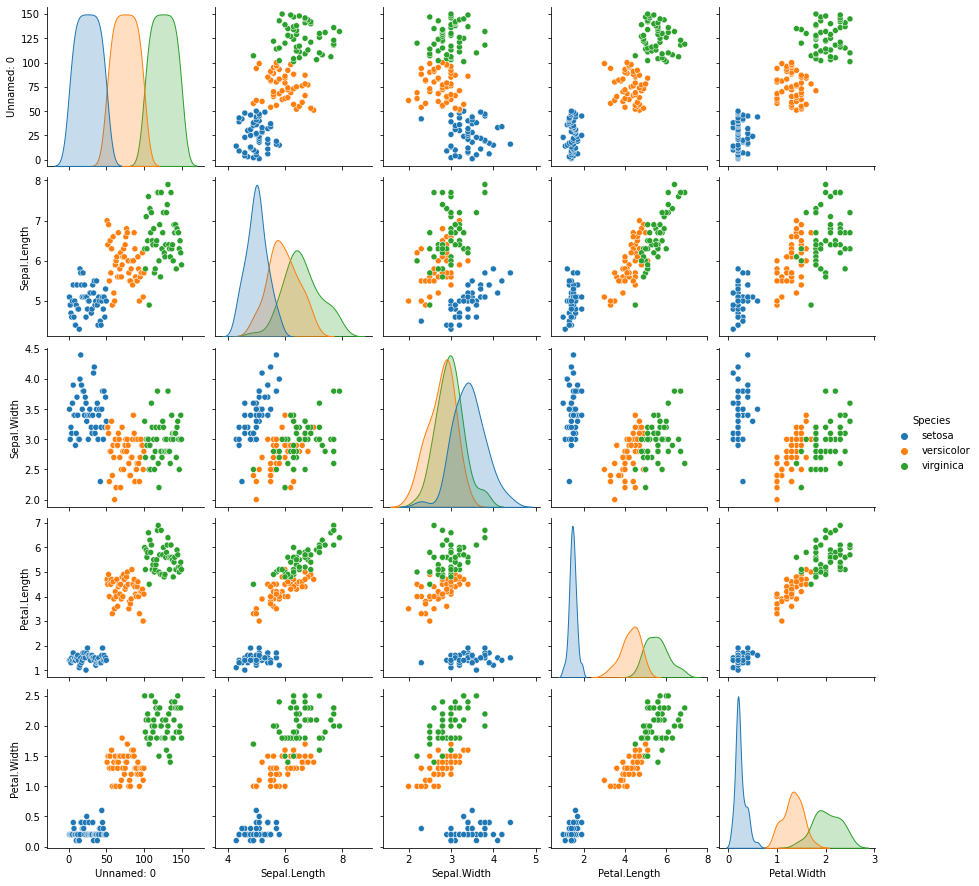

In [11]:
import seaborn as sns
a=sns.pairplot(dataset, hue='Species')
plt.show()

In [12]:
data = dataset[["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]]



In [13]:
X_train, X_val,Y_train,Y_val = train_test_split(data,dataset["Species"],test_size=0.25,random_state=40)


In [14]:

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [15]:
#model formation
print(Y_train)

113     virginica
15         setosa
3          setosa
86     versicolor
127     virginica
          ...    
71     versicolor
12         setosa
50     versicolor
7          setosa
70     versicolor
Name: Species, Length: 112, dtype: object


In [16]:
model1 = LogisticRegression()
model2 = LinearDiscriminantAnalysis()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()
model6 = GaussianNB()
model7 = SVC(gamma='auto')

In [17]:
print("Model 1 : Logistic Regression", "\n")
model1.fit(X_train, Y_train)
prediction = model1.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 1 : Logistic Regression 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 



c:\users\aadarsh gupta\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print("Model 2 : LinearDiscriminantAnalysis (LDA)", "\n")
model2.fit(X_train, Y_train)
prediction = model2.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 2 : LinearDiscriminantAnalysis (LDA) 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 



In [19]:
print("Model 3 : K Neighbors Classifier", "\n")
model3.fit(X_train, Y_train)
prediction = model3.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 3 : K Neighbors Classifier 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 



In [20]:
print("Model 4 : Decision Tree Classifier", "\n")
model4.fit(X_train, Y_train)
prediction = model4.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 4 : Decision Tree Classifier 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 



In [21]:
print("Model 5 : Random Forest Classifier", "\n")
model5.fit(X_train, Y_train)
prediction = model5.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 5 : Random Forest Classifier 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 



In [22]:
print("Model 6 : Gaussian Naive Bayes", "\n")
model6.fit(X_train, Y_train)
prediction = model6.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 6 : Gaussian Naive Bayes 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 



In [24]:
print("Model 7 : Support Vector Machine (SVM)", "\n")
model7.fit(X_train, Y_train)
prediction = model7.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 7 : Support Vector Machine (SVM) 

Acurracy of the model : 1.0 

Confusion matrix : 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]] 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 

